In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
# import seaborn as sns
import cmasher as cmr

In [3]:
CUTOFF = [400, 450, 500, 550]
FORCES = ["LO", "NLO", "N2LO", "N3LO", "N4LO", "N4LO+"]

plt.style.use(['science', 'retro'])

mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'DejaVu Sans'
mpl.rcParams['mathtext.it'] = 'DejaVu Sans:italic'
mpl.rcParams['mathtext.bf'] = 'DejaVu Sans:bold'

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "DejaVu Sans"

plt.rc('text', usetex=True)
plt.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['lines.linewidth'] = 2

line_styles = {"LO": {"marker": "d", "markevery": 10, "markersize": 3, "color": "tab:cyan"},
               "NLO": {"marker": ".", "markevery": 10, "color": "orange"},
               "N2LO": {"ls":  (0, (5, 3)), "color": "green"},
               "N3LO": {"ls": "dotted", "color": "blue"},
               "N4LO": {"ls": (0, (5, 2, 0.8, 2, 0.8, 2)), "color": "red"},
               "N4LO+": {"color": "black"},
               "AV18": {"ls": (0, (5, 2, 1.3, 2,)), "color": "blueviolet"},
               "SIEGERT": {"color": "blue"},
               "1NC": {"color": "deeppink", "ls": "dashed"}
               }
ls_cutoff = {400: line_styles["N4LO"],
             450: line_styles["N4LO+"],
             500: line_styles["N2LO"],
             550: line_styles["N3LO"],
             }


In [4]:
factor = 0.98*1e22
# cmap = mpl.cm.get_cmap('CMRmap_r', 11)
cmap = cmr.get_sub_cmap('CMRmap_r', 0.05, 1, N=10)

In [10]:
def relative_diff(*args):
    return (max(args) - min(args))/np.mean(args)

# Maps $^3He$

## Dalitz XY

In [5]:
df_xy = pd.read_csv("./data_3HE_N4LO+_cut=2/for_Dalitz_plot_with_v4_xy2_w.txt",
                    sep=" ", skipinitialspace=True, header=None, index_col=0,
                   names=["ELAB1", "ELAB2", "ELAB3", "x", "y", "val"])
df_e = pd.read_csv("./data_3HE_N4LO+_cut=2/for_Dalitz_plot_with_v4_E1E2.txt",
                    sep=" ", skipinitialspace=True, header=None, index_col=0,
                   names=["ELAB1", "ELAB2", "ELAB3","val"])
df_xy_pw = pd.read_csv("./data_3HE_N4LO+_cut=2/for_Dalitz_plot_with_v4_xy2_w_PWIAS.txt",
                    sep=" ", skipinitialspace=True, header=None, index_col=0,
                   names=["ELAB1", "ELAB2", "ELAB3", "x", "y", "val"])
df_e_pw = pd.read_csv("./data_3HE_N4LO+_cut=2/for_Dalitz_plot_with_v4_E1E2_PWIAS.txt",
                    sep=" ", skipinitialspace=True, header=None, index_col=0,
                   names=["ELAB1", "ELAB2", "ELAB3","val"])
df_xy_1nc = pd.read_csv("./data_3HE_N4LO+_cut=2/for_Dalitz_plot_with_v4_xy2_w_1NC.txt",
                    sep=" ", skipinitialspace=True, header=None, index_col=0,
                   names=["ELAB1", "ELAB2", "ELAB3", "x", "y", "val"])
df_e_1nc = pd.read_csv("./data_3HE_N4LO+_cut=2/for_Dalitz_plot_with_v4_E1E2_1NC.txt",
                    sep=" ", skipinitialspace=True, header=None, index_col=0,
                   names=["ELAB1", "ELAB2", "ELAB3","val"])
df_xy_2nf = pd.read_csv("./data_3HE_N4LO+_cut=2/for_Dalitz_plot_xy2_w.txt",
                    sep=" ", skipinitialspace=True, header=None, index_col=0,
                   names=["ELAB1", "ELAB2", "ELAB3", "x", "y", "val"])
df_e_2nf = pd.read_csv("./data_3HE_N4LO+_cut=2/for_Dalitz_plot_E1E2.txt",
                    sep=" ", skipinitialspace=True, header=None, index_col=0,
                   names=["ELAB1", "ELAB2", "ELAB3","val"])



In [6]:

newcolors= np.array([[224,224,224], [153, 204, 255], [102, 255, 255],
                     [51, 153, 255], [0, 128, 255], [0, 102, 204],
                     [0, 51, 102], [0, 25, 51], [25, 0, 51], [0, 0, 0]])
bounds_x_pw = np.array([5.0E-08, 1.0E-07, 4.0E-07, 7.0E-07, 1.0E-06, 4.0E-06, 7.0E-06, 1.0E-05, 2.0E-05])*1e22
bounds_x_1nc = np.array([6.0E-08, 8.0E-8, 1.0E-07, 2.0E-07, 4.0E-07, 6.0E-07, 8.0E-07, 1.0E-06, 4.0E-06])*1e21
# bounds_x_2nf = bounds_x_pw
bounds_x_2nf = np.array([5.0E-08, 1.0E-07, 4.0E-07, 7.0E-07, 1.0E-06, 4.0E-06, 7.0E-06, 1.0E-05, 1.3E-05])*1e22
bounds_x = np.array([4.0E-08, 7.0E-08, 1.0E-07, 4.0E-07, 7.0E-07, 1.0E-06, 4.0E-06, 7.0E-06, 1.0E-05])*1e22
bounds_x_2nf = bounds_x
bounds_x_pw = bounds_x


# cmap = mpl.colors.ListedColormap(newcolors/255)
# cmap = mpl.cm.get_cmap('CMRmap_r', 12)
# cmap = mpl.colors.Colormap("CMRmap_r")
norm_x = [mpl.colors.BoundaryNorm(b, 10) for b in [bounds_x_pw, bounds_x_1nc, bounds_x_2nf, bounds_x]]


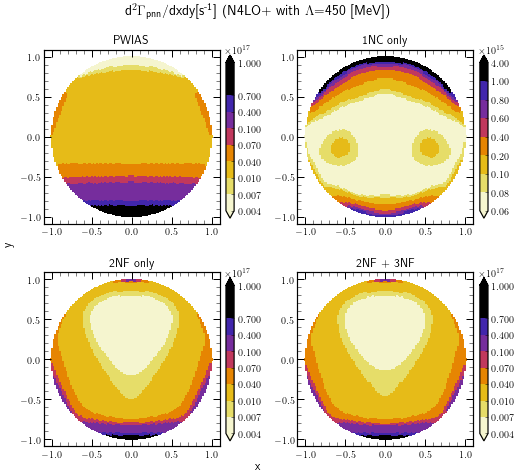

In [7]:
fig = plt.figure(figsize=(7.5,7))
fig.suptitle(r"d$^2\Gamma_{\text{pnn}}$/dxdy[s$^\text{-1}$] (N4LO+ with $\Lambda$=450 [MeV])", size=14)
fig.supxlabel("x", y=0.05, size=12)
fig.supylabel("y", x=0.03, size=12)

for i, (df, title) in enumerate(zip([df_xy_pw, df_xy_1nc, df_xy_2nf, df_xy],
                                  ["PWIAS", "1NC only", "2NF only", "2NF + 3NF"])):
    ax = plt.subplot(221 + i)
    # p = plt.scatter(df.x, df.y, c=df.val*factor, cmap=mpl.cm.get_cmap('CMRmap_r', 10), norm=norm_x[i], marker="s", s=6.5, edgecolors='none')
    p = plt.scatter(df.x, df.y, c=df.val*factor, cmap=cmap, norm=norm_x[i], marker="s", s=6.5, edgecolors='none')
    ax.set_aspect('equal', adjustable='box')
    plt.title(title)
    plt.minorticks_on()
    plt.xticks(ticks=np.arange(-1, 1.1, 0.5))
    plt.yticks(ticks=np.arange(-1, 1.1, 0.5))
    plt.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
    plt.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
    # plt.grid(which='major', alpha=0.3)
    cbar = plt.colorbar(p, ax=ax, shrink=0.8, pad=0.03, extend="both")
    cbar.ax.minorticks_off()
    cbar.ax.get_yaxis().get_offset_text().set_x(3.0)
    # if i < 2:
    #     ax.set_xticklabels([])
    # if i % 2 != 0:
    #     ax.set_yticklabels([])
        # cbar.set_label('$d^2\Gamma_{\text{pnn}}/dxdy[s^{-1}]$')
plt.tight_layout()
plt.savefig("./figures/Dalitz_map_pnn_xy.pdf", dpi=600, facecolor="white")
plt.show()

## CUTOFFS

### 3NF

#### xy

In [117]:
df_cuts = {}
for cut in range(1,5):
    df_cuts[cut] = pd.read_csv(f"./data_3HE_N4LO+_cut={cut}/for_Dalitz_plot_with_v4_xy2_w.txt",
                    sep=" ", skipinitialspace=True, header=None, index_col=0,
                   names=["ELAB1", "ELAB2", "ELAB3", "x", "y", "val"])

In [118]:
bounds_x = np.array([4.0E-08, 7.0E-08, 1.0E-07, 4.0E-07, 7.0E-07, 1.0E-06, 4.0E-06, 7.0E-06, 1.0E-05])*1e22
# bounds_x = np.array([5.0E-08, 8.0E-08, 7.0E-07, 1.0E-06, 4.0E-06, 7.0E-06, 1.0E-05, 2.0E-05, 3.0E-05])*1e22

# cmap = mpl.cm.get_cmap('CMRmap_r', 11)
norm_x = mpl.colors.BoundaryNorm(bounds_x, cmap.N, extend="both")

In [119]:
from importlib.metadata import version

In [120]:
version("matplotlib")

'3.4.2'

In [73]:
# fig = plt.figure(figsize=(7.5,7))
# # fig.suptitle(r"d$^2\Gamma_{\text{pnn}}$/dxdy[s$^\text{-1}$] (N4LO+, 2NF+3NF)", size=14)
# fig.supxlabel("x", y=0.05, size=12)
# fig.supylabel("y", x=0.03, size=12)

# for cut in range(1,5):
#     ax = plt.subplot(220 + cut)
#     # p = plt.scatter(df.x, df.y, c=df.val*factor, cmap=cmap, norm=norm_x[i], marker="s", s=6.5, edgecolors='none')
#     p = plt.scatter(df_cuts[cut].x, df_cuts[cut].y, c=df_cuts[cut].val*factor,
#                     cmap=cmap, norm=norm_x,
#                     marker="s", s=6.5, edgecolors='none')
#     ax.set_aspect('equal', adjustable='box')
#     plt.title(f"$\Lambda$ = {350 + 50*cut} [MeV]")
#     plt.minorticks_on()
#     plt.xticks(ticks=np.arange(-1, 1.1, 0.5))
#     plt.yticks(ticks=np.arange(-1, 1.1, 0.5))
#     plt.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
#     plt.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
#     # plt.grid(which='major', alpha=0.3)
#     cbar = plt.colorbar(p, ax=ax, shrink=0.8, pad=0.03)
#     cbar.ax.minorticks_off()
#     cbar.ax.get_yaxis().get_offset_text().set_x(3.0)
#     # if i < 2:
#     #     ax.set_xticklabels([])
#     # if i % 2 != 0:
#     #     ax.set_yticklabels([])
#         # cbar.set_label('$d^2\Gamma_{\text{pnn}}/dxdy[s^{-1}]$')
# plt.tight_layout()
# # plt.savefig("./figures/Dalitz_map_pnn_xy_cutofs.pdf", dpi=600, facecolor="white")
# plt.show()

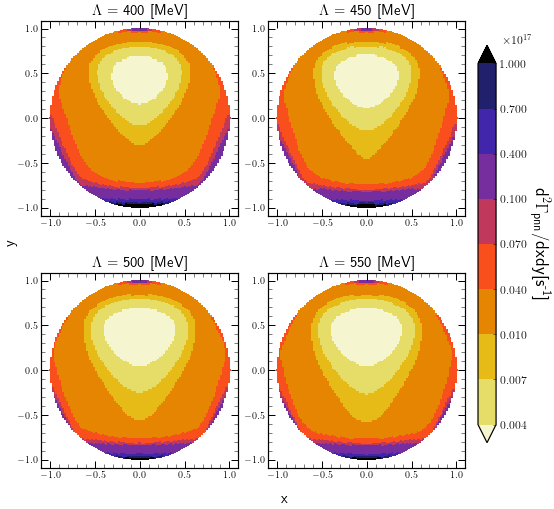

In [121]:
fig, axes = plt.subplots(2, 2, figsize=(7.5,7), constrained_layout=True)
# fig.suptitle(r"d$^2\Gamma_{\text{pnn}}$/dxdy[s$^\text{-1}$] (N4LO+, 2NF+3NF)", size=18)
fig.supxlabel("x", y=-0.02, size=15)
fig.supylabel("y", x=-0.02, size=15)

for cut, ax in enumerate(axes.flat):
    p = ax.scatter(df_cuts[cut+1].x, df_cuts[cut+1].y, c=df_cuts[cut+1].val*factor,
                    cmap=cmap, norm=norm_x,
                    marker="s", s=6.5, edgecolors='none')
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"$\Lambda$ = {350 + 50*(cut+1)} [MeV]", size=15)
    plt.minorticks_on()
    ax.set_xticks(ticks=np.arange(-1, 1.1, 0.5))
    ax.set_yticks(ticks=np.arange(-1, 1.1, 0.5))
    ax.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
    # plt.grid(which='major', alpha=0.3)
cbar = fig.colorbar(p, ax=axes.ravel().tolist(), shrink=0.8, pad=0.03)
cbar.ax.minorticks_off()
cbar.ax.get_yaxis().get_offset_text().set_x(3.0)
cbar.ax.get_yaxis().get_offset_text().set_fontsize(12)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label=r"d$^2\Gamma_{\text{pnn}}$/dxdy[s$^\text{-1}$]", size=18, rotation=-90, labelpad=25)

plt.savefig("./figures/Dalitz_map_pnn_xy_cutofs.pdf", dpi=600, facecolor="white")
plt.show()

In [128]:
cut

3

#### E1E2

In [75]:
df_e_cuts = {}
for cut in range(1,5):
    df_e_cuts[cut] = pd.read_csv(f"./data_3HE_N4LO+_cut={cut}/for_Dalitz_plot_with_v4_E1E2.txt",
                    sep=" ", skipinitialspace=True, header=None, index_col=0,
                   names=["ELAB1", "ELAB2", "ELAB3","val"])

In [76]:
bounds_e = np.array([5.0E-07, 7.0E-07, 1.0E-06, 4.0E-06, 7.0E-06, 1.0E-05, 5.0E-05, 1.0E-04, 3.0E-04])*1e22


norm_e = mpl.colors.BoundaryNorm(bounds_e, cmap.N, extend='both')

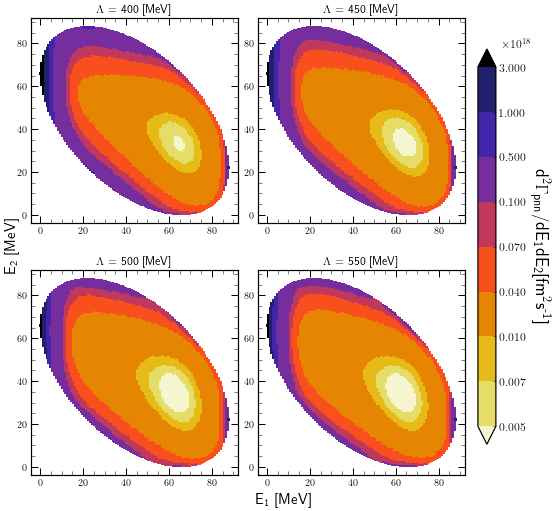

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(7.5,7), constrained_layout=True)
fig.supxlabel(r"E$_\text{1}$ [MeV]", y=-0.02, size=15)
fig.supylabel(r"E$_\text{2}$ [MeV]", x=-0.02, size=15)

for cut, ax in enumerate(axes.flat):
    p = ax.scatter(df_e_cuts[cut+1].ELAB1, df_e_cuts[cut+1].ELAB2, c=df_e_cuts[cut+1].val*factor,
                cmap=cmap, norm=norm_e,
                marker="s", s=6.5, edgecolors='none')
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"$\Lambda$ = {400 + 50*cut} [MeV]")
    plt.minorticks_on()
    ax.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
    # plt.grid(which='major', alpha=0.3)
    # cbar = plt.colorbar(p, ax=ax, shrink=0.8, pad=0.03)
    # cbar.ax.get_yaxis().get_offset_text().set_x(3.0)
    # cbar.ax.minorticks_off()
cbar = fig.colorbar(p, ax=axes.ravel().tolist(), shrink=0.8, pad=0.03)
cbar.ax.minorticks_off()
cbar.ax.get_yaxis().get_offset_text().set_x(3.0)
cbar.ax.get_yaxis().get_offset_text().set_fontsize(12)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label=r"d$^2\Gamma_{\text{pnn}}$/dE$_\text{1}$dE$_\text{2}$[fm$^2$s$^\text{-1}$]",
               size=18, rotation=-90, labelpad=25)


# plt.tight_layout()
plt.savefig("./figures/Dalitz_map_pnn_E1E2_cutofs.pdf", dpi=600, facecolor="white")

### PWIAS

#### xy

In [81]:
df_cuts = {}
for cut in range(1,5):
    df_cuts[cut] = pd.read_csv(f"./data_3He/3HE_N4LO+_cut={cut}-for_Dalitz_plot_with_v4_xy2_w_PWIAS.txt",
                    sep=" ", skipinitialspace=True, header=None, index_col=0,
                   names=["ELAB1", "ELAB2", "ELAB3", "x", "y", "val"])

In [82]:
bounds_x = np.array([4.0E-08, 7.0E-08, 1.0E-07, 4.0E-07, 7.0E-07, 1.0E-06, 4.0E-06, 7.0E-06, 1.0E-05])*1e22
# bounds_x = np.array([5.0E-08, 8.0E-08, 7.0E-07, 1.0E-06, 4.0E-06, 7.0E-06, 1.0E-05, 2.0E-05, 3.0E-05])*1e22

# cmap = mpl.cm.get_cmap('CMRmap_r', 11)
norm_x = mpl.colors.BoundaryNorm(bounds_x, cmap.N, extend='both')

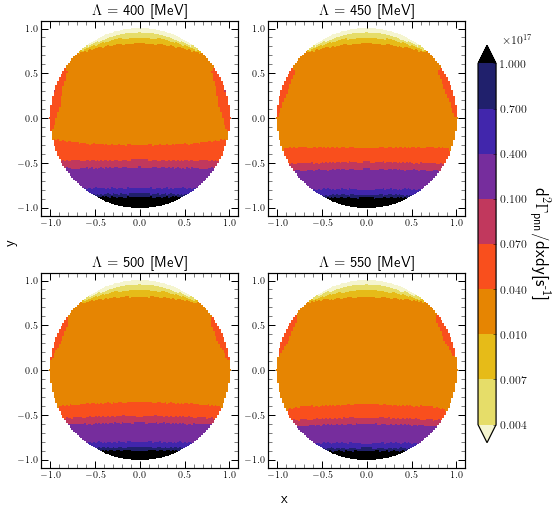

In [83]:
fig, axes = plt.subplots(2, 2, figsize=(7.5,7), constrained_layout=True)
# fig.suptitle(r"d$^2\Gamma_{\text{pnn}}$/dxdy[s$^\text{-1}$] (N4LO+, 2NF+3NF)", size=18)
fig.supxlabel("x", y=-0.02, size=15)
fig.supylabel("y", x=-0.02, size=15)

for cut, ax in enumerate(axes.flat):
    p = ax.scatter(df_cuts[cut+1].x, df_cuts[cut+1].y, c=df_cuts[cut+1].val*factor,
                    cmap=cmap, norm=norm_x,
                    marker="s", s=6.5, edgecolors='none')
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"$\Lambda$ = {350 + 50*(cut+1)} [MeV]", size=15)
    plt.minorticks_on()
    ax.set_xticks(ticks=np.arange(-1, 1.1, 0.5))
    ax.set_yticks(ticks=np.arange(-1, 1.1, 0.5))
    ax.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
    # plt.grid(which='major', alpha=0.3)
cbar = fig.colorbar(p, ax=axes.ravel().tolist(), shrink=0.8, pad=0.03)
cbar.ax.minorticks_off()
cbar.ax.get_yaxis().get_offset_text().set_x(3.0)
cbar.ax.get_yaxis().get_offset_text().set_fontsize(12)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label=r"d$^2\Gamma_{\text{pnn}}$/dxdy[s$^\text{-1}$]", size=18, rotation=-90, labelpad=25)

plt.savefig("./figures/Dalitz_map_pnn_xy_cutofs_PWIAS.pdf", dpi=600, facecolor="white")
plt.show()

#### E1E2

In [84]:
df_e_cuts = {}
for cut in range(1,5):
    df_e_cuts[cut] = pd.read_csv(f"./data_3He/3HE_N4LO+_cut={cut}-for_Dalitz_plot_with_v4_E1E2_PWIAS.txt",
                    sep=" ", skipinitialspace=True, header=None, index_col=0,
                   names=["ELAB1", "ELAB2", "ELAB3","val"])

In [85]:
bounds_e = np.array([5.0E-07, 7.0E-07, 1.0E-06, 4.0E-06, 7.0E-06, 1.0E-05, 5.0E-05, 1.0E-04, 3.0E-04])*1e22


norm_e = mpl.colors.BoundaryNorm(bounds_e, cmap.N, extend='both')

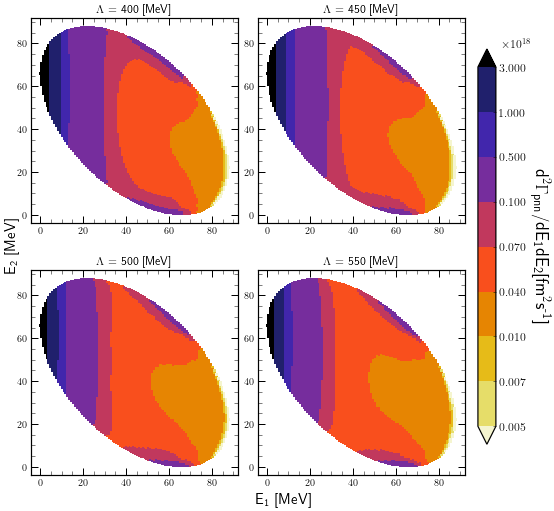

In [86]:
fig, axes = plt.subplots(2, 2, figsize=(7.5,7), constrained_layout=True)
fig.supxlabel(r"E$_\text{1}$ [MeV]", y=-0.02, size=15)
fig.supylabel(r"E$_\text{2}$ [MeV]", x=-0.02, size=15)

for cut, ax in enumerate(axes.flat):
    p = ax.scatter(df_e_cuts[cut+1].ELAB1, df_e_cuts[cut+1].ELAB2, c=df_e_cuts[cut+1].val*factor,
                cmap=cmap, norm=norm_e,
                marker="s", s=6.5, edgecolors='none')
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"$\Lambda$ = {400 + 50*cut} [MeV]")
    plt.minorticks_on()
    ax.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
    # plt.grid(which='major', alpha=0.3)
    # cbar = plt.colorbar(p, ax=ax, shrink=0.8, pad=0.03)
    # cbar.ax.get_yaxis().get_offset_text().set_x(3.0)
    # cbar.ax.minorticks_off()
cbar = fig.colorbar(p, ax=axes.ravel().tolist(), shrink=0.8, pad=0.03)
cbar.ax.minorticks_off()
cbar.ax.get_yaxis().get_offset_text().set_x(3.0)
cbar.ax.get_yaxis().get_offset_text().set_fontsize(12)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label=r"d$^2\Gamma_{\text{pnn}}$/dE$_\text{1}$dE$_\text{2}$[fm$^2$s$^\text{-1}$]",
               size=18, rotation=-90, labelpad=25)

plt.savefig("./figures/Dalitz_map_pnn_E1E2_cutofs_PWIAS.pdf", dpi=600, facecolor="white")

### 1NC

#### xy

In [90]:
df_cuts = {}
for cut in range(1,5):
    df_cuts[cut] = pd.read_csv(f"./data_3He/3HE_N4LO+_cut={cut}-for_Dalitz_plot_with_v4_xy2_w_1NC.txt",
                    sep=" ", skipinitialspace=True, header=None, index_col=0,
                   names=["ELAB1", "ELAB2", "ELAB3", "x", "y", "val"])

In [91]:
bounds_x = np.array([6.0E-08, 8.0E-8, 1.0E-07, 2.0E-07,
                    4.0E-07, 6.0E-07, 8.0E-07, 1.0E-06, 4.0E-06])*1e21
# bounds_x = np.array([5.0E-08, 8.0E-08, 7.0E-07, 1.0E-06, 4.0E-06, 7.0E-06, 1.0E-05, 2.0E-05, 3.0E-05])*1e22

# cmap = mpl.cm.get_cmap('CMRmap_r', 11)
norm_x = mpl.colors.BoundaryNorm(bounds_x, cmap.N, extend='both')

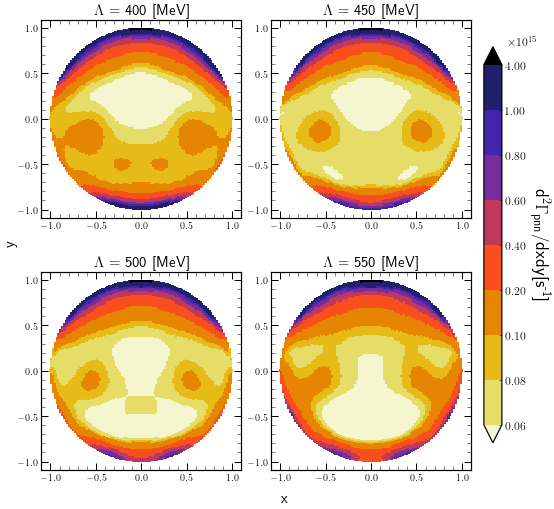

In [92]:
fig, axes = plt.subplots(2, 2, figsize=(7.5,7), constrained_layout=True)
# fig.suptitle(r"d$^2\Gamma_{\text{pnn}}$/dxdy[s$^\text{-1}$] (N4LO+, 2NF+3NF)", size=18)
fig.supxlabel("x", y=-0.02, size=15)
fig.supylabel("y", x=-0.02, size=15)

for cut, ax in enumerate(axes.flat):
    p = ax.scatter(df_cuts[cut+1].x, df_cuts[cut+1].y, c=df_cuts[cut+1].val*factor,
                    cmap=cmap, norm=norm_x,
                    marker="s", s=6.5, edgecolors='none')
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"$\Lambda$ = {350 + 50*(cut+1)} [MeV]", size=15)
    plt.minorticks_on()
    ax.set_xticks(ticks=np.arange(-1, 1.1, 0.5))
    ax.set_yticks(ticks=np.arange(-1, 1.1, 0.5))
    ax.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
    # plt.grid(which='major', alpha=0.3)
cbar = fig.colorbar(p, ax=axes.ravel().tolist(), shrink=0.8, pad=0.03)
cbar.ax.minorticks_off()
cbar.ax.get_yaxis().get_offset_text().set_x(3.0)
cbar.ax.get_yaxis().get_offset_text().set_fontsize(12)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label=r"d$^2\Gamma_{\text{pnn}}$/dxdy[s$^\text{-1}$]", size=18, rotation=-90, labelpad=25)

plt.savefig("./figures/Dalitz_map_pnn_xy_cutofs_1NC.pdf", dpi=600, facecolor="white")
plt.show()

#### E1E2

In [87]:
df_e_cuts = {}
for cut in range(1,5):
    df_e_cuts[cut] = pd.read_csv(f"./data_3He/3HE_N4LO+_cut={cut}-for_Dalitz_plot_with_v4_E1E2_1NC.txt",
                    sep=" ", skipinitialspace=True, header=None, index_col=0,
                   names=["ELAB1", "ELAB2", "ELAB3","val"])

In [88]:
bounds_e = np.array([2.0E-07, 4.5E-7, 7.0E-7, 1.0E-06,
                         5.0E-06, 1.0E-05, 5.0E-05, 1.0E-04,
                        1.2E-04])*1e22

norm_e = mpl.colors.BoundaryNorm(bounds_e, cmap.N, extend='both')

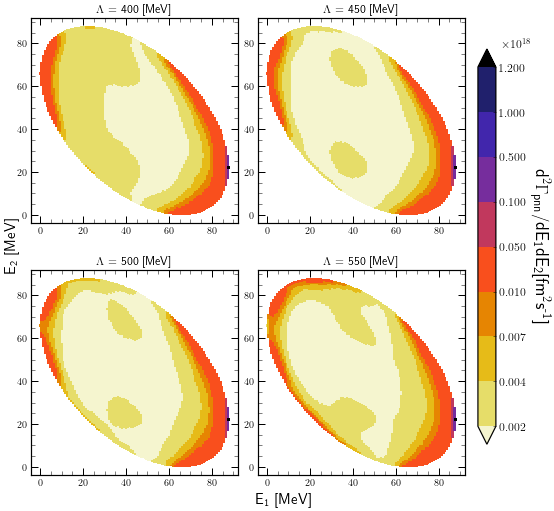

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(7.5,7), constrained_layout=True)
fig.supxlabel(r"E$_\text{1}$ [MeV]", y=-0.02, size=15)
fig.supylabel(r"E$_\text{2}$ [MeV]", x=-0.02, size=15)

for cut, ax in enumerate(axes.flat):
    p = ax.scatter(df_e_cuts[cut+1].ELAB1, df_e_cuts[cut+1].ELAB2, c=df_e_cuts[cut+1].val*factor,
                cmap=cmap, norm=norm_e,
                marker="s", s=6.5, edgecolors='none')
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"$\Lambda$ = {400 + 50*cut} [MeV]")
    plt.minorticks_on()
    ax.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
    # plt.grid(which='major', alpha=0.3)
    # cbar = plt.colorbar(p, ax=ax, shrink=0.8, pad=0.03)
    # cbar.ax.get_yaxis().get_offset_text().set_x(3.0)
    # cbar.ax.minorticks_off()
cbar = fig.colorbar(p, ax=axes.ravel().tolist(), shrink=0.8, pad=0.03)
cbar.ax.minorticks_off()
cbar.ax.get_yaxis().get_offset_text().set_x(3.0)
cbar.ax.get_yaxis().get_offset_text().set_fontsize(12)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label=r"d$^2\Gamma_{\text{pnn}}$/dE$_\text{1}$dE$_\text{2}$[fm$^2$s$^\text{-1}$]",
               size=18, rotation=-90, labelpad=25)

plt.savefig("./figures/Dalitz_map_pnn_E1E2_cutofs_1NC.pdf", dpi=600, facecolor="white")

## Chiral Orders

### xy

In [6]:
df_orders = {}
for force in FORCES[2:]:
    df_orders[force] = pd.read_csv(f"./data_3He/{force}-for_Dalitz_plot_with_v4_xy2_w.txt",
                    sep=" ", skipinitialspace=True, header=None, index_col=0,
                   names=["ELAB1", "ELAB2", "ELAB3", "x", "y", "val"])

In [7]:
bounds_x = np.array([4.0E-08, 7.0E-08, 1.0E-07, 4.0E-07, 7.0E-07, 1.0E-06, 4.0E-06, 7.0E-06, 1.0E-05])*1e22
# bounds_x = np.array([5.0E-08, 8.0E-08, 7.0E-07, 1.0E-06, 4.0E-06, 7.0E-06, 1.0E-05, 2.0E-05, 3.0E-05])*1e22

# cmap = mpl.cm.get_cmap('CMRmap_r', 11)
norm_x = mpl.colors.BoundaryNorm(bounds_x, cmap.N, extend='both')

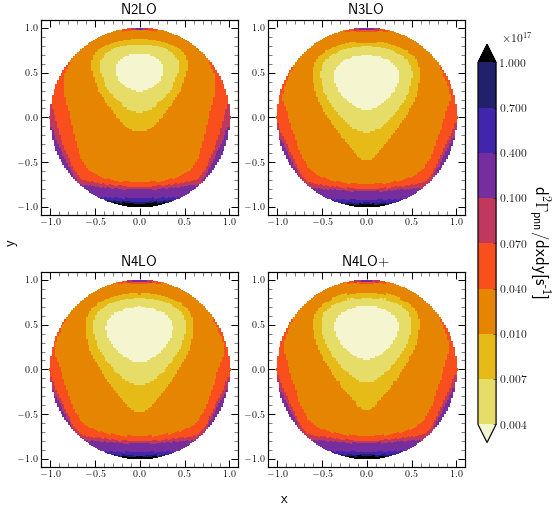

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(7.5,7), constrained_layout=True)
# fig.suptitle(r"d$^2\Gamma_{\text{pnn}}$/dxdy[s$^\text{-1}$] (N4LO+, 2NF+3NF)", size=18)
fig.supxlabel("x", y=-0.02, size=15)
fig.supylabel("y", x=-0.02, size=15)
for force, ax in zip(FORCES[2:], axes.flat):
    p = ax.scatter(df_orders[force].x, df_orders[force].y, c=df_orders[force].val*factor,
                    cmap=cmap, norm=norm_x,
                    marker="s", s=6.5, edgecolors='none')
    ax.set_aspect('equal', adjustable='box')
    # ax.set_title(f"$\Lambda$ = {350 + 50*(cut+1)} [MeV]", size=15)
    ax.set_title(force, size=15)
    plt.minorticks_on()
    ax.set_xticks(ticks=np.arange(-1, 1.1, 0.5))
    ax.set_yticks(ticks=np.arange(-1, 1.1, 0.5))
    ax.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
    # plt.grid(which='major', alpha=0.3)
cbar = fig.colorbar(p, ax=axes.ravel().tolist(), shrink=0.8, pad=0.03)
cbar.ax.minorticks_off()
cbar.ax.get_yaxis().get_offset_text().set_x(3.0)
cbar.ax.get_yaxis().get_offset_text().set_fontsize(12)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label=r"d$^2\Gamma_{\text{pnn}}$/dxdy[s$^\text{-1}$]", size=18, rotation=-90, labelpad=25)

plt.savefig("./figures/Dalitz_map_pnn_xy_orders.pdf", dpi=600, facecolor="white")
plt.show()

### E1E2

In [11]:
df_e_orders = {}
for force in FORCES[2:]:
    df_e_orders[force] = pd.read_csv(f"./data_3He/{force}-for_Dalitz_plot_with_v4_E1E2.txt",
                    sep=" ", skipinitialspace=True, header=None, index_col=0,
                   names=["ELAB1", "ELAB2", "ELAB3","val"])

In [12]:
bounds_e = np.array([5.0E-07, 7.0E-07, 1.0E-06, 4.0E-06, 7.0E-06, 1.0E-05, 5.0E-05, 1.0E-04, 3.0E-04])*1e22


norm_e = mpl.colors.BoundaryNorm(bounds_e, cmap.N, extend='both')

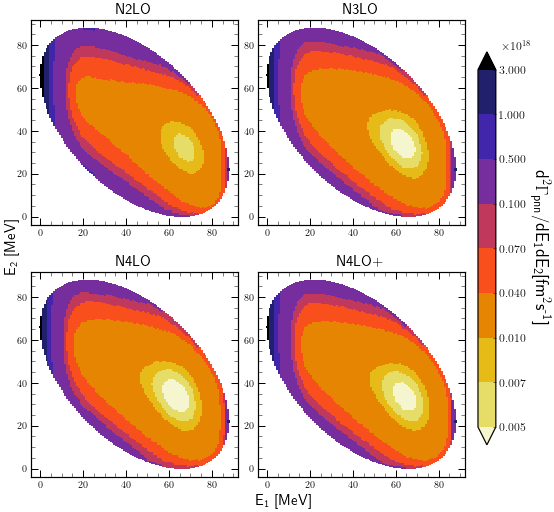

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(7.5,7), constrained_layout=True)
fig.supxlabel(r"E$_\text{1}$ [MeV]", y=-0.02, size=15)
fig.supylabel(r"E$_\text{2}$ [MeV]", x=-0.02, size=15)

for force, ax in zip(FORCES[2:], axes.flat):
    p = ax.scatter(df_e_orders[force].ELAB1, df_e_orders[force].ELAB2, c=df_e_orders[force].val*factor,
                cmap=cmap, norm=norm_e,
                marker="s", s=6.5, edgecolors='none')
    ax.set_aspect('equal', adjustable='box')
    # ax.set_title(f"$\Lambda$ = {400 + 50*cut} [MeV]")
    ax.set_title(force, size=15)
    plt.minorticks_on()
    ax.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
    # plt.grid(which='major', alpha=0.3)
cbar = fig.colorbar(p, ax=axes.ravel().tolist(), shrink=0.8, pad=0.03)
cbar.ax.minorticks_off()
cbar.ax.get_yaxis().get_offset_text().set_x(3.0)
cbar.ax.get_yaxis().get_offset_text().set_fontsize(12)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label=r"d$^2\Gamma_{\text{pnn}}$/dE$_\text{1}$dE$_\text{2}$[fm$^2$s$^\text{-1}$]",
               size=18, rotation=-90, labelpad=25)

plt.savefig("./figures/Dalitz_map_pnn_E1E2_orders.pdf", dpi=600, facecolor="white")

## Other

In [57]:
def relative_diff(*args):
    return (max(args) - min(args))/np.mean(args)


###  $d\Gamma$/dE

In [79]:
df_cuts = {}
for cut in range(1,5):
    df_cuts[f"{cut}_n"] = pd.read_csv(f"./data_3HE_N4LO+_cut={cut}/for_Dalitz_plot_with_v4_dGammadEn.txt",
                    delim_whitespace=True, skipinitialspace=True, header=None, index_col=None,
                    skiprows=1, names=["energy", "dGdq", "dGdE"])
    df_cuts[f"{cut}_p"] = pd.read_csv(f"./data_3HE_N4LO+_cut={cut}/for_Dalitz_plot_with_v4_dGammadEp.txt",
                    delim_whitespace=True, skipinitialspace=True, header=None, index_col=None,
                    skiprows=1, names=["energy", "dGdq", "dGdE"])

In [10]:
df_orders = {}
for force in FORCES[2:]:
    df_orders[f"{force}_n"] = pd.read_csv(f"./data_3He/{force}-for_Dalitz_plot_with_v4_dGammadEn.txt",
                    delim_whitespace=True, skipinitialspace=True, header=None, index_col=None,
                    skiprows=1, names=["energy", "dGdq", "dGdE"])
    df_orders[f"{force}_p"] = pd.read_csv(f"./data_3He/{force}-for_Dalitz_plot_with_v4_dGammadEp.txt",
                    delim_whitespace=True, skipinitialspace=True, header=None, index_col=None,
                    skiprows=1, names=["energy", "dGdq", "dGdE"])

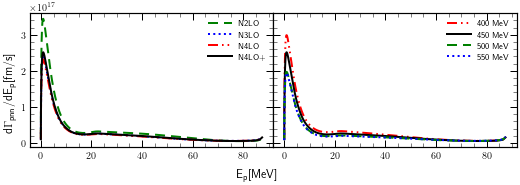

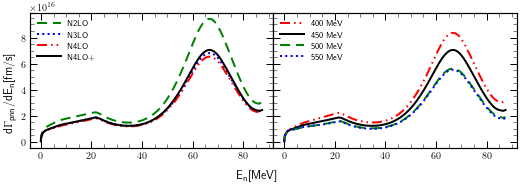

In [56]:
for particle in ["p", "n"]:
    fig = plt.figure(figsize=(7.5, 2.8))
    gs = fig.add_gridspec(ncols=2, wspace=0)
    ax = gs.subplots(sharey=True)
    # fig.supylabel(r"d$\Gamma_{\text{pnn}}$/dE$_\text{p}$[fm/s]", x=0.03)
    # fig.supxlabel(r"E$_\text{p}$[1/fm]", y=0.06)
    fig.supylabel(r"d$\Gamma_{\text{pnn}}$"f"/dE$_\\text{{{{{particle}}}}}$[fm/s]", x=0.03)
    fig.supxlabel(f"E$_\\text{{{{{particle}}}}}$[MeV]", y=0.06)
    for force in FORCES[2:]:
        ax[0].plot(df_orders[f"{force}_{particle}"].energy*197.3, df_orders[f"{force}_{particle}"].dGdE*factor,
                    **line_styles[force], label=force)
    for cut in range(1,5):
        cutoff = 350+50*cut
        ax[1].plot(df_cuts[f"{cut}_{particle}"] .energy*197.3, df_cuts[f"{cut}_{particle}"] .dGdE*factor,
                    **ls_cutoff[cutoff], label=f"{cutoff} MeV")

    # plt.minorticks_on()
    # plt.xticks(ticks=np.arange(-1, 1.1, 0.5))
    # plt.yticks(ticks=np.arange(-1, 1.1, 0.5))
    for axx in ax:
        # axx.set_yscale("log")
        axx.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
        axx.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
        # axx.grid(alpha=0.2)
        axx.set_zorder(-1)
        axx.legend(fontsize=8, handlelength=3)
        
    # plt.legend()
    plt.tight_layout()
    plt.savefig(f"./figures/3HE_dGdE{particle}.pdf", dpi=600, facecolor="white")
    plt.show()

In [17]:
df_orders["N2LO_p"]

,energy,dGdq,dGdE
0,0.000003,1.585610e-09,1.465836e-06
1,0.000025,1.423529e-08,4.386657e-06
2,0.000070,3.934724e-08,7.275001e-06
3,0.000136,7.654851e-08,1.010945e-05
4,0.000226,1.252844e-07,1.286896e-05
...,...,...,...
195,0.425634,2.548699e-07,6.026019e-07
196,0.430000,2.751688e-07,6.472849e-07
197,0.434387,3.100170e-07,7.255664e-07
198,0.438797,3.798412e-07,8.845051e-07


In [71]:
en1, val1 = df_orders["N2LO_p"].sort_values(
    "dGdE", ascending=False).iloc[0][["energy", "dGdE"]].values
en2, val2 = df_orders["N3LO_p"].sort_values(
    "dGdE", ascending=False).iloc[0][["energy", "dGdE"]].values
en3, val3 = df_orders["N4LO_p"].sort_values(
    "dGdE", ascending=False).iloc[0][["energy", "dGdE"]].values
en4, val4 = df_orders["N4LO+_p"].sort_values(
    "dGdE", ascending=False).iloc[0][["energy", "dGdE"]].values

In [72]:
en1*197.3

0.9233742596

In [73]:
relative_diff(val4, val1)

0.31136852250652314

In [74]:
relative_diff(val2, val3, val4)

0.08339516669869848

In [61]:
en, val1 = df_cuts["1_p"].sort_values(
    "dGdE", ascending=False).iloc[0][["energy", "dGdE"]].values
en, val2 = df_cuts["2_p"].sort_values(
    "dGdE", ascending=False).iloc[0][["energy", "dGdE"]].values
en, val3 = df_cuts["3_p"].sort_values(
    "dGdE", ascending=False).iloc[0][["energy", "dGdE"]].values
en, val4 = df_cuts["4_p"].sort_values(
    "dGdE", ascending=False).iloc[0][["energy", "dGdE"]].values

In [62]:
relative_diff(val3, val4)

0.014650808222071519

In [63]:
relative_diff(val1, val2, val3)

0.40788820440064866

In [75]:
en1, val1 = df_orders["N2LO_n"].sort_values(
    "dGdE", ascending=False).iloc[0][["energy", "dGdE"]].values
en2, val2 = df_orders["N3LO_n"].sort_values(
    "dGdE", ascending=False).iloc[0][["energy", "dGdE"]].values
en3, val3 = df_orders["N4LO_n"].sort_values(
    "dGdE", ascending=False).iloc[0][["energy", "dGdE"]].values
en4, val4 = df_orders["N4LO+_n"].sort_values(
    "dGdE", ascending=False).iloc[0][["energy", "dGdE"]].values

In [69]:
en1*197.3, en2*197.3, en3*197.3, en4*197.3

(66.90535731, 66.90535731, 66.90535731, 66.90535731)

In [70]:
relative_diff(val1, val4)

0.2898112994811908

In [76]:
relative_diff(val2, val3, val4)

0.07531535824050065

In [80]:
en, val1 = df_cuts["1_n"].sort_values(
    "dGdE", ascending=False).iloc[0][["energy", "dGdE"]].values
en, val2 = df_cuts["2_n"].sort_values(
    "dGdE", ascending=False).iloc[0][["energy", "dGdE"]].values
en, val3 = df_cuts["3_n"].sort_values(
    "dGdE", ascending=False).iloc[0][["energy", "dGdE"]].values
en, val4 = df_cuts["4_n"].sort_values(
    "dGdE", ascending=False).iloc[0][["energy", "dGdE"]].values

In [82]:
relative_diff(val1, val2, val3)

0.3907976835154657

### $d\Gamma$/dr

In [74]:
df_cuts = {}
for cut in range(1,5):
    df_cuts[cut] = pd.read_csv(f"./data_3HE_N4LO+_cut={cut}/dgammadr_with_v4.txt",
                    delim_whitespace=True, skipinitialspace=True, header=None, index_col=None,
                    skiprows=1, names=["r", "dGdr", "DUMMY"])

In [75]:
df_orders = {}
for force in FORCES[2:]:
    df_orders[force] = pd.read_csv(f"./data_3He/{force}-dgammadr_with_v4.txt",
                    delim_whitespace=True, skipinitialspace=True, header=None, index_col=None,
                    skiprows=1, names=["r", "dGdr", "DUMMY"])

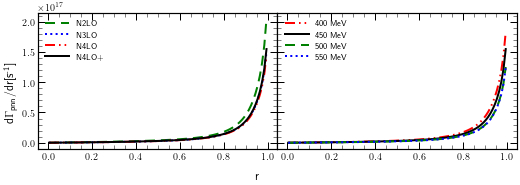

In [76]:
fig = plt.figure(figsize=(7.5, 2.8))
gs = fig.add_gridspec(ncols=2, wspace=0)
ax = gs.subplots(sharey=True)
# fig.supylabel(r"d$\Gamma_{\text{pnn}}$/dE$_\text{p}$[fm/s]", x=0.03)
# fig.supxlabel(r"E$_\text{p}$[1/fm]", y=0.06)
fig.supylabel(r"d$\Gamma_{\text{pnn}}$/dr[s$^{\text{-1}}$]", x=0.03)
fig.supxlabel("r", y=0.06)
for force in FORCES[2:]:
    ax[0].plot(df_orders[force].r, df_orders[force].dGdr*factor,
                **line_styles[force], label=force)
for cut in range(1,5):
    cutoff = 350+50*cut
    ax[1].plot(df_cuts[cut] .r, df_cuts[cut] .dGdr*factor,
                **ls_cutoff[cutoff], label=f"{cutoff} MeV")

# plt.minorticks_on()
# plt.xticks(ticks=np.arange(-1, 1.1, 0.5))
# plt.yticks(ticks=np.arange(-1, 1.1, 0.5))
for axx in ax:
    # axx.set_yscale("log")
    axx.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
    axx.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
    # axx.grid(alpha=0.2)
    axx.set_zorder(-1)
    axx.legend(fontsize=8, handlelength=3)

    
# plt.legend()
plt.tight_layout()
plt.savefig("./figures/3HE_dGdr.pdf", dpi=600, facecolor="white")
plt.show()

### d $\Gamma$/d $\phi$

In [77]:
df_cuts = {}
for cut in range(1,5):
    df_cuts[cut] = pd.read_csv(f"./data_3HE_N4LO+_cut={cut}/dgammadphi_with_v4.txt",
                    delim_whitespace=True, skipinitialspace=True, header=None, index_col=None,
                    skiprows=1, names=["phi", "dGdphi", "DUMMY"])
df_orders = {}
for force in FORCES[2:]:
    df_orders[force] = pd.read_csv(f"./data_3He/{force}-dgammadphi_with_v4.txt",
                    delim_whitespace=True, skipinitialspace=True, header=None, index_col=None,
                    skiprows=1, names=["phi", "dGdphi", "DUMMY"])

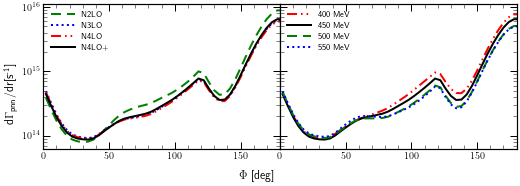

In [78]:
fig = plt.figure(figsize=(7.5, 2.8))
gs = fig.add_gridspec(ncols=2, wspace=0)
ax = gs.subplots(sharey=True)
# fig.supylabel(r"d$\Gamma_{\text{pnn}}$/dE$_\text{p}$[fm/s]", x=0.03)
# fig.supxlabel(r"E$_\text{p}$[1/fm]", y=0.06)
fig.supylabel(r"d$\Gamma_{\text{pnn}}$/dr[s$^{\text{-1}}$]", x=0.03)
fig.supxlabel(r"$\Phi$ [deg]", y=0.06)
for force in FORCES[2:]:
    ax[0].plot(df_orders[force].phi*180/np.pi, df_orders[force].dGdphi*factor,
                **line_styles[force], label=force)
for cut in range(1,5):
    cutoff = 350+50*cut
    ax[1].plot(df_cuts[cut] .phi*180/np.pi, df_cuts[cut].dGdphi*factor,
                **ls_cutoff[cutoff], label=f"{cutoff} MeV")

# plt.minorticks_on()
# plt.xticks(ticks=np.arange(-1, 1.1, 0.5))
# plt.yticks(ticks=np.arange(-1, 1.1, 0.5))
for axx in ax:
    axx.set_yscale("log")
    axx.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
    axx.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
    # axx.grid(alpha=0.2)
    axx.set_zorder(-1)
    axx.legend(fontsize=8, handlelength=3)
    axx.set_xlim([0, 180])

    
# plt.legend()
plt.tight_layout()
plt.savefig("./figures/3HE_dGdphi.pdf", dpi=600, facecolor="white")
plt.show()

# Full

In [3]:
df = pd.read_csv("../pion_all_together.csv", index_col=0)

In [4]:
df["decay type"].unique()

array(['TOTAL', 'N-D', 'P-N-N', 'N-N-N'], dtype=object)

In [5]:
df_tmp = df[(df.spec == "FULL") & (df.force == "3NF") &
            (df.type == "DIRECT") & (df["decay type"] == "P-N-N")].sort_values("order")

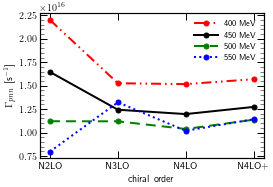

In [13]:
fig = plt.figure(figsize=(4, 2.8))
for cut in range(1, 5):
    cutoff = 350+50*cut
    plt.plot(df_tmp[df_tmp.cutoff == cut].order, factor*df_tmp[df_tmp.cutoff == cut].rate*1e-22, label=f"{cutoff} MeV",
             **ls_cutoff[cutoff], marker=".", markersize=10)
    # ax[1].plot(df_cuts[f"{cut}_{particle}"] .energy, df_cuts[f"{cut}_{particle}"] .dGdE*factor,
    #             **ls_cutoff[cutoff], label=f"{cutoff} MeV")
plt.tick_params(axis="y", which='minor', direction='in',
                length=4, width=0.5, top=True, right=True)
plt.tick_params(axis="x", which='minor', length=0)
plt.tick_params(which='major', direction='in',
                length=7, width=1, top=True, right=True)
plt.ylabel("$\Gamma_{pnn}$ [s$^{-1}$]")
plt.xlabel("chiral order")
plt.ticklabel_format(axis="y", style="sci", scilimits=(16, 16))
plt.legend(fontsize=8, handlelength=3)
plt.tight_layout()

plt.savefig(f"./figures/Gamma_pnn.pdf",
            dpi=600, facecolor="white")
plt.show()


In [14]:
df_tmp = df[(df.spec == "FULL") & (df.force == "3NF") &
            (df.type == "DIRECT") & (df["decay type"] == "N-D")].sort_values("order")

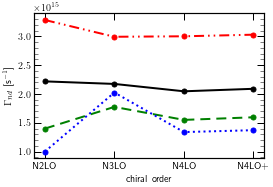

In [16]:
fig = plt.figure(figsize=(4, 2.8))
for cut in range(1, 5):
    cutoff = 350+50*cut
    plt.plot(df_tmp[df_tmp.cutoff == cut].order, factor*df_tmp[df_tmp.cutoff == cut].rate*1e-22, label=f"{cutoff} MeV",
             **ls_cutoff[cutoff], marker=".", markersize=10)
    # ax[1].plot(df_cuts[f"{cut}_{particle}"] .energy, df_cuts[f"{cut}_{particle}"] .dGdE*factor,
    #             **ls_cutoff[cutoff], label=f"{cutoff} MeV")
plt.tick_params(axis="y", which='minor', direction='in',
                length=4, width=0.5, top=True, right=True)
plt.tick_params(axis="x", which='minor', length=0)
plt.tick_params(which='major', direction='in',
                length=7, width=1, top=True, right=True)
plt.ylabel("$\Gamma_{nd}$ [s$^{-1}$]")
plt.xlabel("chiral order")
# plt.legend(fontsize=8, handlelength=3)
plt.tight_layout()

plt.savefig(f"./figures/Gamma_nd.pdf",
            dpi=600, facecolor="white")
plt.show()


In [25]:
df_wavetst = pd.read_csv("../pion_wavefunc_test.csv")

In [42]:
df_tmp = df[(df.spec == "FULL") & (df.force == "3NF") &
            (df.type == "DIRECT") & (df["decay type"] == "P-N-N")].sort_values("order")
df_wv_tmp = df_wavetst[(df_wavetst.spec == "FULL") &
                    (df_wavetst["decay type"] == "P-N-N")].sort_values("order")


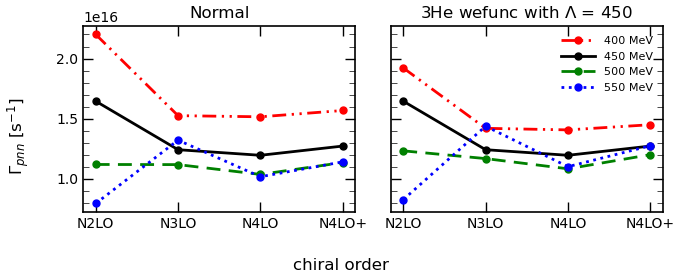

In [44]:
# fig, axes = plt.subplots(ncols=2, figsize=(7, 2.8))
fig = plt.figure(figsize=(7, 2.8))
gs = fig.add_gridspec(ncols=2)
axes = gs.subplots(sharey=True)
fig.supylabel("$\Gamma_{pnn}$ [s$^{-1}$]")
fig.supxlabel("chiral order")
for ax, df_loc in zip(axes, [df_tmp, df_wv_tmp]):
    for cut in range(1, 5):
        cutoff = 350+50*cut
        ax.plot(df_loc[df_loc.cutoff == cut].order, factor*df_loc[df_loc.cutoff == cut].rate*1e-22,
        label=f"{cutoff} MeV",
                **ls_cutoff[cutoff], marker=".", markersize=10)
        # ax[1].plot(df_cuts[f"{cut}_{particle}"] .energy, df_cuts[f"{cut}_{particle}"] .dGdE*factor,
        #             **ls_cutoff[cutoff], label=f"{cutoff} MeV")
    ax.tick_params(axis="y", which='minor', direction='in',
                    length=4, width=0.5, top=True, right=True)
    ax.tick_params(axis="x", which='minor', length=0)
    ax.tick_params(which='major', direction='in',
                    length=7, width=1, top=True, right=True)
plt.legend(fontsize=8, handlelength=3)
plt.tight_layout()
axes[0].set_title("Normal")
axes[1].set_title("3He wefunc with $\Lambda$ = 450")

# plt.savefig(f"./figures/Gamma_pnn.pdf",
#             dpi=600, facecolor="white")
plt.show()


In [32]:
df_tmp = df[(df.spec == "FULL") & (df.force == "3NF") &
            (df.type == "DIRECT") & (df["decay type"] == "N-D")].sort_values("order")
df_wv_tmp = df_wavetst[(df_wavetst.spec == "FULL") &
                    (df_wavetst["decay type"] == "N-D")].sort_values("order")


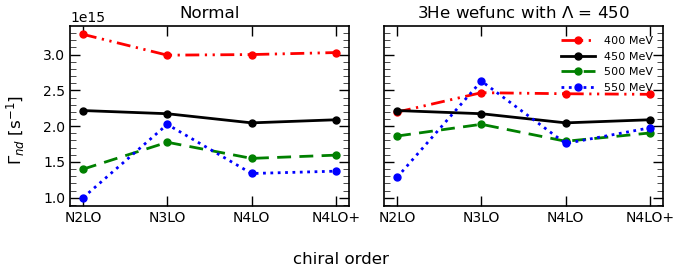

In [36]:
# fig, axes = plt.subplots(ncols=2, figsize=(7, 2.8))
fig = plt.figure(figsize=(7, 2.8))
gs = fig.add_gridspec(ncols=2)
axes = gs.subplots(sharey=True)
fig.supylabel("$\Gamma_{nd}$ [s$^{-1}$]")
fig.supxlabel("chiral order")
for ax, df_loc in zip(axes, [df_tmp, df_wv_tmp]):
    for cut in range(1, 5):
        cutoff = 350+50*cut
        ax.plot(df_loc[df_loc.cutoff == cut].order, factor*df_loc[df_loc.cutoff == cut].rate*1e-22,
                label=f"{cutoff} MeV",
                **ls_cutoff[cutoff], marker=".", markersize=10)
        # ax[1].plot(df_cuts[f"{cut}_{particle}"] .energy, df_cuts[f"{cut}_{particle}"] .dGdE*factor,
        #             **ls_cutoff[cutoff], label=f"{cutoff} MeV")
    ax.tick_params(axis="y", which='minor', direction='in',
                   length=4, width=0.5, top=True, right=True)
    ax.tick_params(axis="x", which='minor', length=0)
    ax.tick_params(which='major', direction='in',
                   length=7, width=1, top=True, right=True)
plt.legend(fontsize=8, handlelength=3)
axes[0].set_title("Normal")
axes[1].set_title("3He wefunc with $\Lambda$ = 450")

plt.tight_layout()

# plt.savefig(f"./figures/Gamma_pnn.pdf",
#             dpi=600, facecolor="white")
plt.show()


In [6]:
df_nn = pd.read_csv("../pion_nn.csv")

In [7]:
df_nn.cutoff = df_nn.cutoff.astype("int")
df_nn.force = df_nn.force.astype("int")

In [8]:
df_nn.sort_values("force", inplace=True)

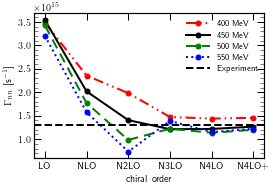

In [9]:
fig = plt.figure(figsize=(4, 2.8))
for cut in range(1, 5):
    cutoff = 350+50*cut
    plt.plot(FORCES, factor*df_nn[df_nn.cutoff == cut].RATE*1e-22, label=f"{cutoff} MeV",
             **ls_cutoff[cutoff], marker=".", markersize=10)
    # ax[1].plot(df_cuts[f"{cut}_{particle}"] .energy, df_cuts[f"{cut}_{particle}"] .dGdE*factor,
    #             **ls_cutoff[cutoff], label=f"{cutoff} MeV")
plt.axhline(1.306*1e15, c="k", ls="dashed", label="Experiment")
plt.tick_params(axis="y", which='minor', direction='in',
                length=4, width=0.5, top=True, right=True)
plt.tick_params(axis="x", which='minor', length=0)
plt.tick_params(which='major', direction='in',
                length=7, width=1, top=True, right=True)
plt.ylabel("$\Gamma_{nn}$ [s$^{-1}$]")
plt.xlabel("chiral order")
plt.legend(fontsize=8, handlelength=3)
plt.tight_layout()

# plt.savefig(f"./figures/Gamma_nn.pdf",
#             dpi=600, facecolor="white")
plt.show()


In [34]:
df_tmp = df_nn.pivot("force", "cutoff")["RATE"]
df_tmp

cutoff,1,2,3,4
force,,,,
0,3.558449e+15,3.613300e+15,3.495809e+15,3.271163e+15
1,2.402156e+15,2.059324e+15,1.805623e+15,1.604833e+15
2,2.021142e+15,1.433245e+15,1.003253e+15,7.490765e+14
3,1.501576e+15,1.236743e+15,1.245895e+15,1.416918e+15
4,1.467356e+15,1.242533e+15,1.158936e+15,1.173089e+15
5,1.483797e+15,1.292482e+15,1.224262e+15,1.247418e+15


In [80]:
data = df_tmp.mean(axis=1).values

In [81]:
data

array([3.48468047e+15, 1.96798415e+15, 1.30167916e+15, 1.35028297e+15,
       1.26047843e+15, 1.31198964e+15])

In [82]:
np.abs(data[:-1] - data[1:])/data[:-1]

array([0.43524689, 0.33857233, 0.03733931, 0.06650794, 0.0408664 ])

In [91]:
2*(df_tmp[1][5]*1e-15 - 1.306)/(df_tmp[1][5]*1e-15 + 1.306)

0.12746223554112704

# Maps $^3H$

## CUTOFFS

### xy

In [59]:
df_cuts[2].head()

,ELAB1,ELAB2,ELAB3,x,y,val
1,43.69673,5.854251,81.53920,-1.00,0.000000,1.121819e-07
2,37.97284,9.094618,84.02272,-0.99,-0.130991,5.208360e-08
3,38.85344,8.654319,83.58242,-0.99,-0.110839,5.669809e-08
4,39.73404,8.214020,83.14212,-0.99,-0.090686,6.215322e-08
5,40.61464,7.773722,82.70182,-0.99,-0.070534,6.856434e-08


In [104]:
df_cuts = {}
for cut in range(1,5):
    df_cuts[cut] = pd.read_csv(f"./data_3H/3H_N4LO+_cut={cut}-for_Dalitz_plot_3h_with_v4_xy2_w.txt",
                    sep=" ", skipinitialspace=True, header=None, index_col=0,
                   names=["ELAB1", "ELAB2", "ELAB3", "x", "y", "val"])

In [105]:
bounds_x = np.array([1.3E-09, 2.0E-09, 5.0E-09, 1.0E-08, 5.0E-08, 1.0E-07, 2.0E-07, 4.0E-07, 1.0E-06])*1e22
# bounds_x = np.array([5.0E-08, 8.0E-08, 7.0E-07, 1.0E-06, 4.0E-06, 7.0E-06, 1.0E-05, 2.0E-05, 3.0E-05])*1e22

norm_x = mpl.colors.BoundaryNorm(bounds_x, cmap.N, extend='both')

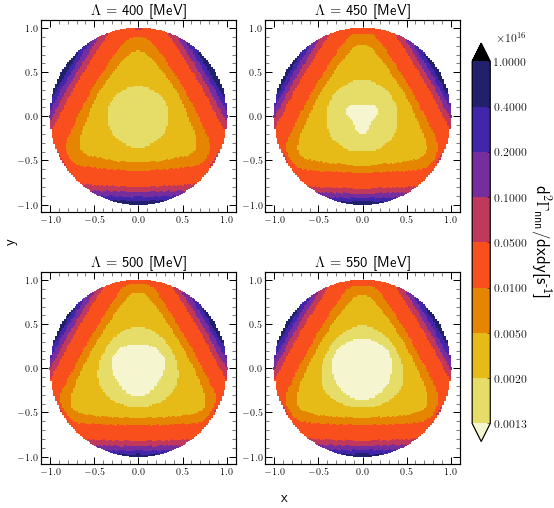

In [106]:
fig, axes = plt.subplots(2, 2, figsize=(7.5,7), constrained_layout=True)
# fig.suptitle(r"d$^2\Gamma_{\text{nnn}}$/dxdy[s$^\text{-1}$] (N4LO+, 2NF+3NF)", size=18)
fig.supxlabel("x", y=-0.02, size=15)
fig.supylabel("y", x=-0.02, size=15)

for cut, ax in enumerate(axes.flat):
    p = ax.scatter(df_cuts[cut+1].x, df_cuts[cut+1].y, c=df_cuts[cut+1].val*factor,
                    cmap=cmap, norm=norm_x,
                    marker="s", s=6.5, edgecolors='none')
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"$\Lambda$ = {350 + 50*(cut+1)} [MeV]", size=15)
    plt.minorticks_on()
    ax.set_xticks(ticks=np.arange(-1, 1.1, 0.5))
    ax.set_yticks(ticks=np.arange(-1, 1.1, 0.5))
    ax.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
    # plt.grid(which='major', alpha=0.3)
cbar = fig.colorbar(p, ax=axes.ravel().tolist(), shrink=0.8, pad=0.03)
cbar.ax.minorticks_off()
cbar.ax.get_yaxis().get_offset_text().set_x(3.0)
cbar.ax.get_yaxis().get_offset_text().set_fontsize(12)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label=r"d$^2\Gamma_{\text{nnn}}$/dxdy[s$^\text{-1}$]", size=18, rotation=-90, labelpad=25)

plt.savefig("./figures/Dalitz_map_nnn_xy_cutofs.pdf", dpi=600, facecolor="white")
plt.show()

### E1E2

In [108]:
df_e_cuts = {}
for cut in range(1,5):
    df_e_cuts[cut] = pd.read_csv(f"./data_3H/3H_N4LO+_cut={cut}-for_Dalitz_plot_3h_v4_E1E2.txt",
                    sep=" ", skipinitialspace=True, header=None, index_col=0,
                   names=["ELAB1", "ELAB2", "ELAB3","val"])

In [109]:
bounds_e = np.array([3.0E-08, 5.0E-08, 1.0E-07, 5.0E-07,
                        1.0E-06, 4.0E-06, 7.0E-06, 1.0E-05,
                        1.2E-05])*1e22


norm_e = mpl.colors.BoundaryNorm(bounds_e, cmap.N, extend='both')

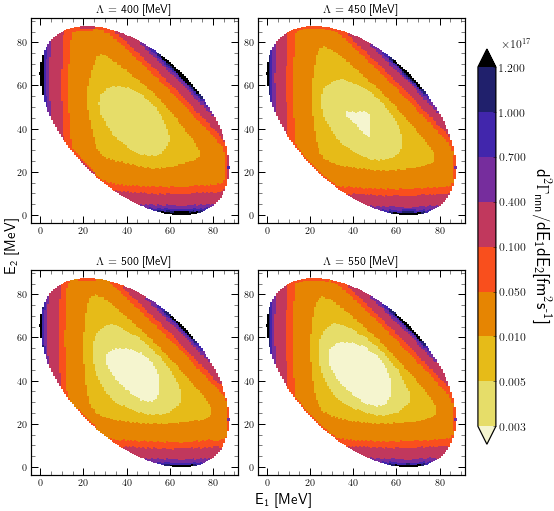

In [110]:
fig, axes = plt.subplots(2, 2, figsize=(7.5,7), constrained_layout=True)
fig.supxlabel(r"E$_\text{1}$ [MeV]", y=-0.02, size=15)
fig.supylabel(r"E$_\text{2}$ [MeV]", x=-0.02, size=15)

for cut, ax in enumerate(axes.flat):
    p = ax.scatter(df_e_cuts[cut+1].ELAB1, df_e_cuts[cut+1].ELAB2, c=df_e_cuts[cut+1].val*factor,
                cmap=cmap, norm=norm_e,
                marker="s", s=6.5, edgecolors='none')
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"$\Lambda$ = {400 + 50*cut} [MeV]")
    plt.minorticks_on()
    ax.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
    # plt.grid(which='major', alpha=0.3)
    # cbar = plt.colorbar(p, ax=ax, shrink=0.8, pad=0.03)
    # cbar.ax.get_yaxis().get_offset_text().set_x(3.0)
    # cbar.ax.minorticks_off()
cbar = fig.colorbar(p, ax=axes.ravel().tolist(), shrink=0.8, pad=0.03)
cbar.ax.minorticks_off()
cbar.ax.get_yaxis().get_offset_text().set_x(3.0)
cbar.ax.get_yaxis().get_offset_text().set_fontsize(12)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label=r"d$^2\Gamma_{\text{nnn}}$/dE$_\text{1}$dE$_\text{2}$[fm$^2$s$^\text{-1}$]",
               size=18, rotation=-90, labelpad=25)


# plt.tight_layout()
plt.savefig("./figures/Dalitz_map_nnn_E1E2_cutofs.pdf", dpi=600, facecolor="white")

## Chiral Orders

### xy

In [111]:
FORCES = ["LO", "NLO", "N2LO", "N3LO", "N4LO", "N4LO+"]

In [112]:
df_orders = {}
for force in FORCES[2:]:
    df_orders[force] = pd.read_csv(f"./data_3H/3H_{force}_cut=2-for_Dalitz_plot_3h_with_v4_xy2_w.txt",
                    sep=" ", skipinitialspace=True, header=None, index_col=0,
                   names=["ELAB1", "ELAB2", "ELAB3", "x", "y", "val"])

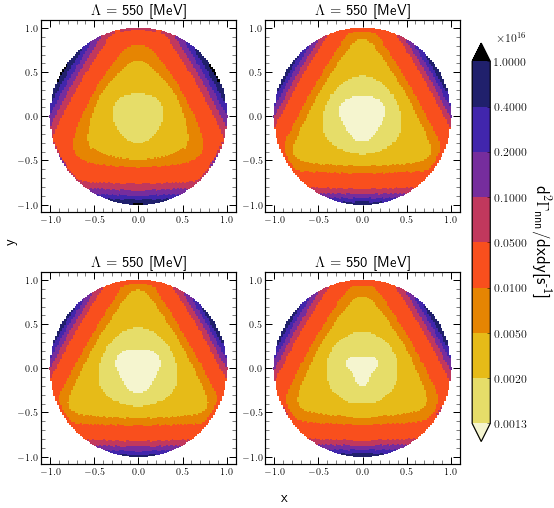

In [113]:
fig, axes = plt.subplots(2, 2, figsize=(7.5,7), constrained_layout=True)
# fig.suptitle(r"d$^2\Gamma_{\text{nnn}}$/dxdy[s$^\text{-1}$] (N4LO+, 2NF+3NF)", size=18)
fig.supxlabel("x", y=-0.02, size=15)
fig.supylabel("y", x=-0.02, size=15)
for force, ax in zip(FORCES[2:], axes.flat):
    p = ax.scatter(df_orders[force].x, df_orders[force].y, c=df_orders[force].val*factor,
                    cmap=cmap, norm=norm_x,
                    marker="s", s=6.5, edgecolors='none')
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"$\Lambda$ = {350 + 50*(cut+1)} [MeV]", size=15)
    plt.minorticks_on()
    ax.set_xticks(ticks=np.arange(-1, 1.1, 0.5))
    ax.set_yticks(ticks=np.arange(-1, 1.1, 0.5))
    ax.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
    # plt.grid(which='major', alpha=0.3)
cbar = fig.colorbar(p, ax=axes.ravel().tolist(), shrink=0.8, pad=0.03)
cbar.ax.minorticks_off()
cbar.ax.get_yaxis().get_offset_text().set_x(3.0)
cbar.ax.get_yaxis().get_offset_text().set_fontsize(12)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label=r"d$^2\Gamma_{\text{nnn}}$/dxdy[s$^\text{-1}$]", size=18, rotation=-90, labelpad=25)

plt.savefig("./figures/Dalitz_map_nnn_xy_orders.pdf", dpi=600, facecolor="white")
plt.show()

### E1E2

In [114]:
df_e_orders = {}
for force in FORCES[2:]:
    df_e_orders[force] = pd.read_csv(f"./data_3H/3H_{force}_cut=2-for_Dalitz_plot_3h_v4_E1E2.txt",
                    sep=" ", skipinitialspace=True, header=None, index_col=0,
                   names=["ELAB1", "ELAB2", "ELAB3","val"])

In [115]:
bounds_e = np.array([3.0E-08, 5.0E-08, 1.0E-07, 5.0E-07,
                        1.0E-06, 4.0E-06, 7.0E-06, 1.0E-05,
                        1.2E-05])*1e22


norm_e = mpl.colors.BoundaryNorm(bounds_e, cmap.N, extend='both')

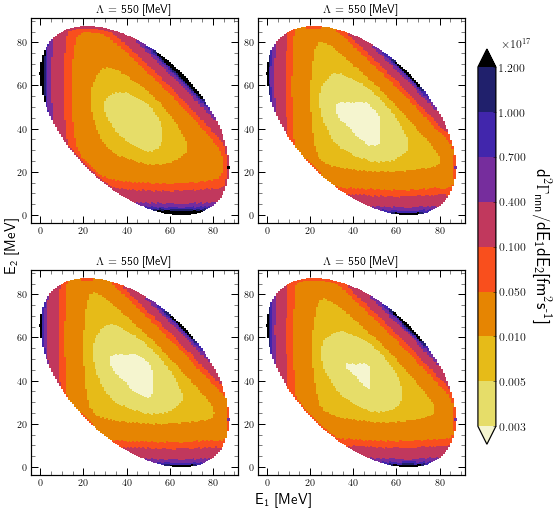

In [116]:
fig, axes = plt.subplots(2, 2, figsize=(7.5,7), constrained_layout=True)
fig.supxlabel(r"E$_\text{1}$ [MeV]", y=-0.02, size=15)
fig.supylabel(r"E$_\text{2}$ [MeV]", x=-0.02, size=15)

for force, ax in zip(FORCES[2:], axes.flat):
    p = ax.scatter(df_e_orders[force].ELAB1, df_e_orders[force].ELAB2, c=df_e_orders[force].val*factor,
                cmap=cmap, norm=norm_e,
                marker="s", s=6.5, edgecolors='none')
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"$\Lambda$ = {400 + 50*cut} [MeV]")
    plt.minorticks_on()
    ax.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
    ax.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
    # plt.grid(which='major', alpha=0.3)
cbar = fig.colorbar(p, ax=axes.ravel().tolist(), shrink=0.8, pad=0.03)
cbar.ax.minorticks_off()
cbar.ax.get_yaxis().get_offset_text().set_x(3.0)
cbar.ax.get_yaxis().get_offset_text().set_fontsize(12)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label=r"d$^2\Gamma_{\text{nnn}}$/dE$_\text{1}$dE$_\text{2}$[fm$^2$s$^\text{-1}$]",
               size=18, rotation=-90, labelpad=25)

plt.savefig("./figures/Dalitz_map_nnn_E1E2_orders.pdf", dpi=600, facecolor="white")

## Other

###  $d\Gamma$/dE

In [5]:
df_cuts = {}
for cut in range(1,5):
    df_cuts[cut] = pd.read_csv(f"./data_3H/3H_N4LO+_cut={cut}-for_Dalitz_plot_3h_with_v4_dGammadEn.txt",
                    delim_whitespace=True, skipinitialspace=True, header=None, index_col=None,
                    skiprows=1, names=["energy", "dGdq", "dGdE"])


In [6]:
df_orders = {}
for force in FORCES[2:]:
    df_orders[force] = pd.read_csv(f"./data_3H/3H_{force}_cut=2-for_Dalitz_plot_3h_with_v4_dGammadEn.txt",
                    delim_whitespace=True, skipinitialspace=True, header=None, index_col=None,
                    skiprows=1, names=["energy", "dGdq", "dGdE"])

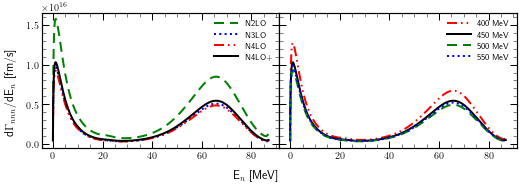

In [8]:
fig = plt.figure(figsize=(7.5, 2.8))
gs = fig.add_gridspec(ncols=2, wspace=0)
ax = gs.subplots(sharey=True)
# fig.supylabel(r"d$\Gamma_{\text{pnn}}$"f"/dE$_\\text{{{{{particle}}}}}$[fm/s]", x=0.03)
fig.supylabel(r"d$\Gamma_{nnn}$"f"/dE$_n$ [fm/s]", x=0.03)
fig.supxlabel(f"E$_n$ [MeV]", y=0.06)
for force in FORCES[2:]:
    ax[0].plot(df_orders[force].energy*197.3, df_orders[force].dGdE*1e22,
                **line_styles[force], label=force)
for cut in range(1,5):
    cutoff = 350+50*cut
    ax[1].plot(df_cuts[cut] .energy*197.3, df_cuts[cut] .dGdE*1e22,
                **ls_cutoff[cutoff], label=f"{cutoff} MeV")


for axx in ax:
    axx.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
    axx.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
    # axx.grid(alpha=0.2)
    axx.set_zorder(-1)
    axx.legend(fontsize=8, handlelength=3)
    
# plt.legend()
plt.tight_layout()
plt.savefig("./figures/3H_dGdEn.pdf", dpi=600, facecolor="white")
plt.show()

### $d\Gamma$/dr

In [96]:
df_cuts = {}
for cut in range(1,5):
    df_cuts[cut] = pd.read_csv(f"./data_3H/3H_N4LO+_cut={cut}-dgammadr_3h_with_v4.txt",
                    delim_whitespace=True, skipinitialspace=True, header=None, index_col=None,
                               skiprows=1, names=["r", "dGdr", "DUMMY"])


In [97]:
df_orders = {}
for force in FORCES[2:]:
    df_orders[force] = pd.read_csv(f"./data_3H/3H_{force}_cut=2-dgammadr_3h_with_v4.txt",
                    delim_whitespace=True, skipinitialspace=True, header=None, index_col=None,
                                   skiprows=1, names=["r", "dGdr", "DUMMY"])


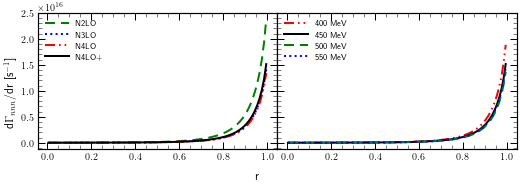

In [98]:
fig = plt.figure(figsize=(7.5, 2.8))
gs = fig.add_gridspec(ncols=2, wspace=0)
ax = gs.subplots(sharey=True)
# fig.supylabel(r"d$\Gamma_{\text{pnn}}$/dr[s$^{\text{-1}}$]", x=0.03)
fig.supylabel(r"d$\Gamma_{nnn}$/dr [s$^{{-1}}$]", x=0.03)
fig.supxlabel("r", y=0.06)
for force in FORCES[2:]:
    ax[0].plot(df_orders[force].r, df_orders[force].dGdr*1e22,
                **line_styles[force], label=force)
for cut in range(1,5):
    cutoff = 350+50*cut
    ax[1].plot(df_cuts[cut] .r, df_cuts[cut] .dGdr*1e22,
                **ls_cutoff[cutoff], label=f"{cutoff} MeV")

# plt.minorticks_on()
# plt.xticks(ticks=np.arange(-1, 1.1, 0.5))
# plt.yticks(ticks=np.arange(-1, 1.1, 0.5))
for axx in ax:
    # axx.set_yscale("log")
    axx.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
    axx.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
    # axx.grid(alpha=0.2)
    axx.set_zorder(-1)
    axx.legend(fontsize=8, handlelength=3)

    
# plt.legend()
plt.tight_layout()
plt.savefig("./figures/3H_dGdr.pdf", dpi=600, facecolor="white")
plt.show()

### d $\Gamma$/d $\phi$

In [99]:
df_cuts = {}
for cut in range(1,5):
    df_cuts[cut] = pd.read_csv(f"./data_3H/3H_N4LO+_cut={cut}-dgammadphi_3h_with_v4.txt",
                    delim_whitespace=True, skipinitialspace=True, header=None, index_col=None,
                    skiprows=1, names=["phi", "dGdphi", "DUMMY"])
df_orders = {}
for force in FORCES[2:]:
    df_orders[force] = pd.read_csv(f"./data_3H/3H_{force}_cut=2-dgammadphi_3h_with_v4.txt",
                    delim_whitespace=True, skipinitialspace=True, header=None, index_col=None,
                    skiprows=1, names=["phi", "dGdphi", "DUMMY"])

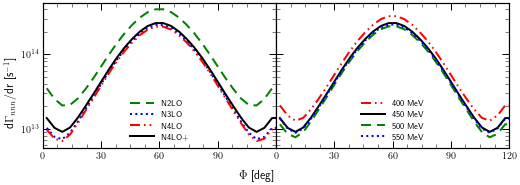

In [100]:
fig = plt.figure(figsize=(7.5, 2.8))
gs = fig.add_gridspec(ncols=2, wspace=0)
ax = gs.subplots(sharey=True)
fig.supylabel(r"d$\Gamma_{{nnn}}$/dr [s$^{{-1}}$]", x=0.03)
fig.supxlabel(r"$\Phi$ [deg]", y=0.06)
for force in FORCES[2:]:
    ax[0].plot(df_orders[force].phi*180/np.pi, df_orders[force].dGdphi*1e22,
                **line_styles[force], label=force)
for cut in range(1,5):
    cutoff = 350+50*cut
    ax[1].plot(df_cuts[cut] .phi*180/np.pi, df_cuts[cut].dGdphi*1e22,
                **ls_cutoff[cutoff], label=f"{cutoff} MeV")

# plt.minorticks_on()
# plt.yticks(ticks=np.arange(-1, 1.1, 0.5))
for i, axx in enumerate(ax):
    axx.set_xticks(ticks=np.arange(0, 120+i, 30))
    axx.set_yscale("log")
    axx.tick_params(which='minor', direction='in', length=4, width=0.5, top=True, right=True)
    axx.tick_params(which='major', direction='in', length=7, width=1, top=True, right=True)
    # axx.grid(alpha=0.2)
    axx.set_zorder(-1)
    axx.legend(fontsize=8, handlelength=3)
    axx.set_xlim([0, 120])

    
# plt.legend()
plt.tight_layout()
plt.savefig("./figures/3H_dGdphi.pdf", dpi=600, facecolor="white")
plt.show()

# Full